# <span style="color:#336699">CAP-351 - Neurocomputação
<hr style="border:1px solid #0077b9;">

Professor:
- Mascos G. Quiles

Discente:
- Camila P. Sales

## Atividade

- Experimentos da rede GNG com pelo menos 3 datasets
- Entregar relatório descrevendo os experimentos

### Variar:
- Idade dos links
<br>
- Tempo para adição de neurônios
- Número de neurônios

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from neupy import algorithms, utils
import seaborn as sns


## IRIS

### Valores de exemplo (NeuPy)

In [30]:
df = pd.read_csv( "transfusion.data", sep=",");

df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


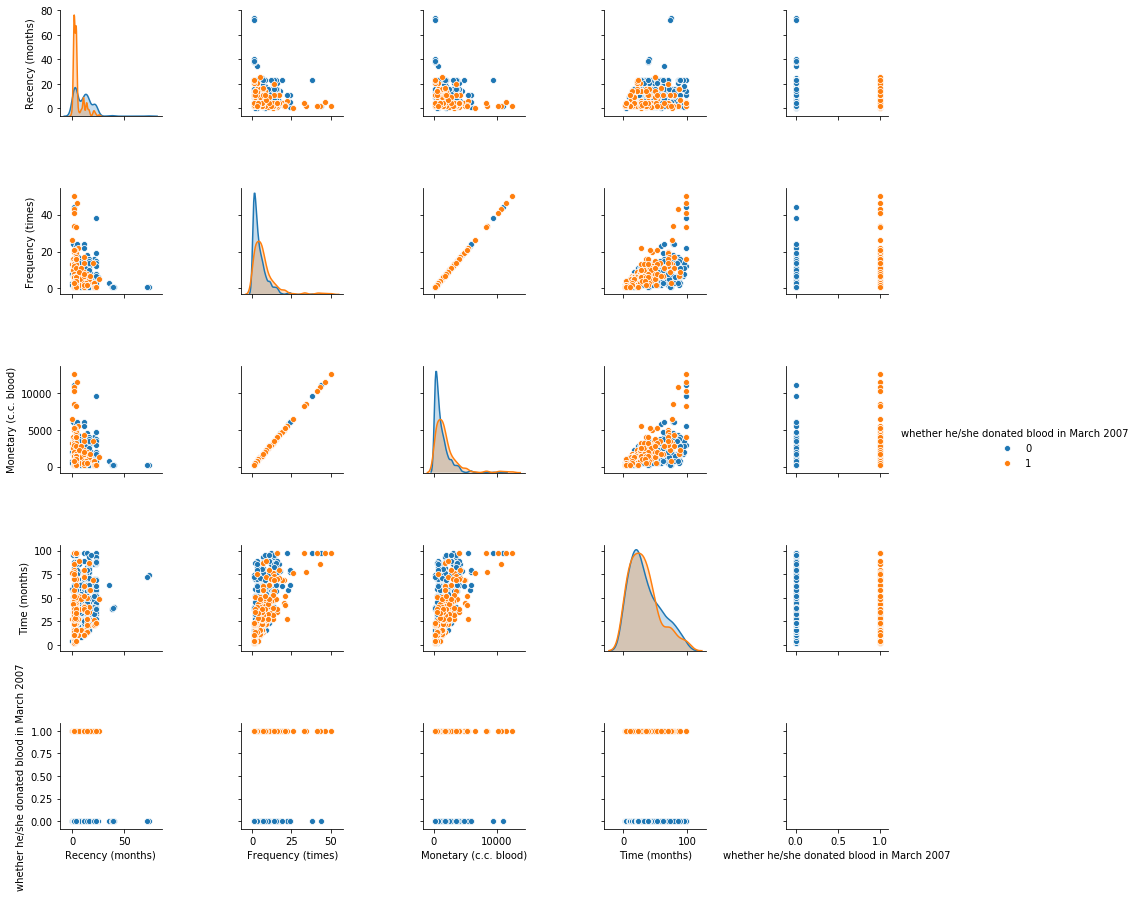

In [31]:
g = sns.pairplot(df, hue='whether he/she donated blood in March 2007')

In [22]:
s = {'L': 0,'B': 1,'R': 2}
df['class'] = df['class'].map(s)

In [23]:
data = df[['Left-Weight','Left-Distance']].to_numpy()
_ = df['class'].to_numpy()

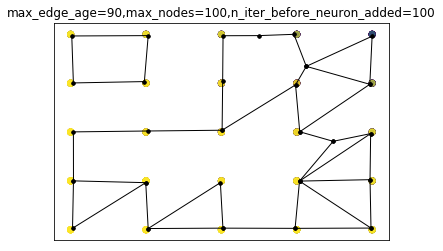

In [24]:
utils.reproducible()

gng = algorithms.GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=2,

    shuffle_data=True,
    verbose=False,

    step=0.1,
    neighbour_step=0.001,
    
    max_edge_age=90,
    max_nodes=100,
    n_iter_before_neuron_added=100,
    
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.2,
)

fig = plt.figure()
plt.scatter(*data.T, alpha=0.5,c=_)
plt.xticks([], [])
plt.yticks([], [])
plt.title("max_edge_age=90,max_nodes=100,n_iter_before_neuron_added=100")

def animate(i):
    for line in animate.prev_lines:
        line.remove()
        
    # Training will slow down overtime and we increase number
    # of data samples for training
    n = int(0.5 * gng.n_iter_before_neuron_added * (1 + i // 100))
    
    sampled_data_ids = np.random.choice(len(data), n)
    sampled_data = data[sampled_data_ids, :]
    gng.train(sampled_data, epochs=1)
        
    lines = []
    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))
    
    animate.prev_lines = lines
    return lines

animate.prev_lines = []
anim = animation.FuncAnimation(fig, animate, tqdm(np.arange(220)), interval=30, blit=True)
HTML(anim.to_html5_video())

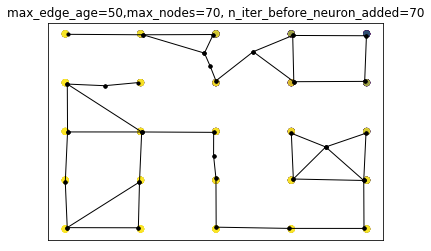

In [25]:
utils.reproducible()

gng = algorithms.GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=2,

    shuffle_data=True,
    verbose=False,
    
    step=0.1,
    neighbour_step=0.001,
    
    max_edge_age=50,
    max_nodes=70,
    n_iter_before_neuron_added=70,
    
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.2,
)

fig = plt.figure()
plt.scatter(*data.T, alpha=0.5,c=_)
plt.xticks([], [])
plt.yticks([], [])
plt.title("max_edge_age=50,max_nodes=70, n_iter_before_neuron_added=70")

def animate(i):
    for line in animate.prev_lines:
        line.remove()
        
    # Training will slow down overtime and we increase number
    # of data samples for training
    n = int(0.5 * gng.n_iter_before_neuron_added * (1 + i // 100))
    
    sampled_data_ids = np.random.choice(len(data), n)
    sampled_data = data[sampled_data_ids, :]
    gng.train(sampled_data, epochs=1)
        
    lines = []
    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))
    
    animate.prev_lines = lines
    return lines

animate.prev_lines = []
anim = animation.FuncAnimation(fig, animate, tqdm(np.arange(220)), interval=30, blit=True)
HTML(anim.to_html5_video())

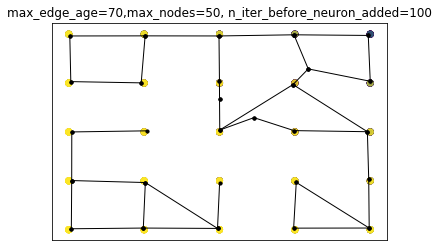

In [26]:
utils.reproducible()

gng = algorithms.GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=2,

    shuffle_data=True,
    verbose=False,
    
    step=0.1,
    neighbour_step=0.001,
    
    max_edge_age=80,
    max_nodes=50,
    n_iter_before_neuron_added=100,
    
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.2,
)

fig = plt.figure()
plt.scatter(*data.T, alpha=0.5,c=_)
plt.xticks([], [])
plt.yticks([], [])
plt.title("max_edge_age=70,max_nodes=50, n_iter_before_neuron_added=100")

def animate(i):
    for line in animate.prev_lines:
        line.remove()
        
    # Training will slow down overtime and we increase number
    # of data samples for training
    n = int(0.5 * gng.n_iter_before_neuron_added * (1 + i // 100))
    
    sampled_data_ids = np.random.choice(len(data), n)
    sampled_data = data[sampled_data_ids, :]
    gng.train(sampled_data, epochs=1)
        
    lines = []
    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))
    
    animate.prev_lines = lines
    return lines

animate.prev_lines = []
anim = animation.FuncAnimation(fig, animate, tqdm(np.arange(350)), interval=30, blit=True)
HTML(anim.to_html5_video())